# Packages and Initialization

In [1]:
library(tidyverse)
library(httr2) # for making api requests
library(uuid)  # For generating a UUID
library(jsonlite) # for working with JSONs

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [2]:
canada_url <- "https://ch.tetr.io/api/users/by/league?country=CA&limit?=25"

In [27]:
get_league_leaderboard<- function(country,session_id){
    url <- "https://ch.tetr.io/api/users/by/league?"
    paginate <- TRUE
    paginate_key <- NULL
    all_players <- NULL
    
    while (paginate){
        if (is.null(paginate_key)){
            request <- request(url) %>%
        req_url_query(country = country,
                      limit = 100) %>%
        req_headers(
            `User-Agent` = "RemiliaScarlet",
            `X-Session-ID` = session_id
        )
        result <- req_perform(request)|> 
        resp_body_string()|>
        fromJSON()|>
        as.data.frame()|>
        flatten(recursive = TRUE)
        } else {
            request <- request(url) %>%
        req_url_query(country= country,
                      limit = 100,
                      after = paginate_key) %>%
        req_headers(
            `User-Agent` = "RemiliaScarlet",
            `X-Session-ID` = session_id,
        )
        result <- req_perform(request)|> 
        resp_body_string()|>
        fromJSON()|>
        as.data.frame()|>
        flatten(recursive = TRUE)
        }
        if (is.null(all_players)){
            all_players <- result
        } else {
            all_players <- full_join(all_players, result)
        }
        
        length <- nrow(result)
        if (length < 100){
        paginate <- FALSE
        } else {
        last_user <- slice_min(result,`data.entries.p.pri`)
        paginate_key <- last_user$`data.entries.p.pri`|>
        paste("0","0", sep = ":")
        }
        Sys.sleep(1)
    }
    return(all_players)
}
# Gets the last games played by the user
get_user_games_json <- function(username,session_id){
        url <- paste0("https://ch.tetr.io/api/users/",username,"/records/league/recent")
        request <- request(url) %>%
        req_headers(
            `User-Agent` = "RemiliaScarlet",
            `X-Session-ID` = session_id
        )
        result <- req_perform(request)|> 
        resp_body_string()|>
        fromJSON()
        return(result)
        
}

# Parse the match data json into a dataframe
parse_user_matches <- function(json){
    dataframe <- 
}


In [7]:
session_id <- UUIDgenerate()
players_df <- get_league_leaderboard("CA",session_id)

ERROR: [1m[33mError[39m in `req_perform()`:[22m
[33m![39m `req` must be an HTTP request object, not a function.


In [29]:
session_id <- UUIDgenerate()
get_user_games_json("2hp",session_id)

$success
[1] TRUE

$data
$data$entries
                        _id     replayid  stub gamemode    pb oncepb
1  6868b98d94e68868ed954e03 c9802bb62602 FALSE   league FALSE  FALSE
2  6868b6bc84e270599073912d 3fbe24582f89 FALSE   league FALSE  FALSE
3  6868b48b9c76fd17e1c80a82 77d96f226072 FALSE   league FALSE  FALSE
4  6868b2dd9c76fd17e1c80a64 43828d0ed8da FALSE   league FALSE  FALSE
5  6868b0b42beded9c52dff17d ae3fae59ab67 FALSE   league FALSE  FALSE
6  6868afb0e509bb14c6d40f99 50dcae5c4788 FALSE   league FALSE  FALSE
7  686863a2cda25ac45b142942 eeff42fb134c FALSE   league FALSE  FALSE
8  6866ef5918e454c31fd78376 e2625c326f1c FALSE   league FALSE  FALSE
9  68664dbcee681267d376c910 e4f7253c8470 FALSE   league FALSE  FALSE
10 68664ba684e2705990735c11 b970c122f2f9 FALSE   league FALSE  FALSE
11 686649e71217560931285096 f431d4c9e138 FALSE   league FALSE  FALSE
12 686647ad84e2705990735bc4 30a3157f60f1 FALSE   league FALSE  FALSE
13 6866460418e454c31fd772d0 841b489ca962 FALSE   league FALSE  F

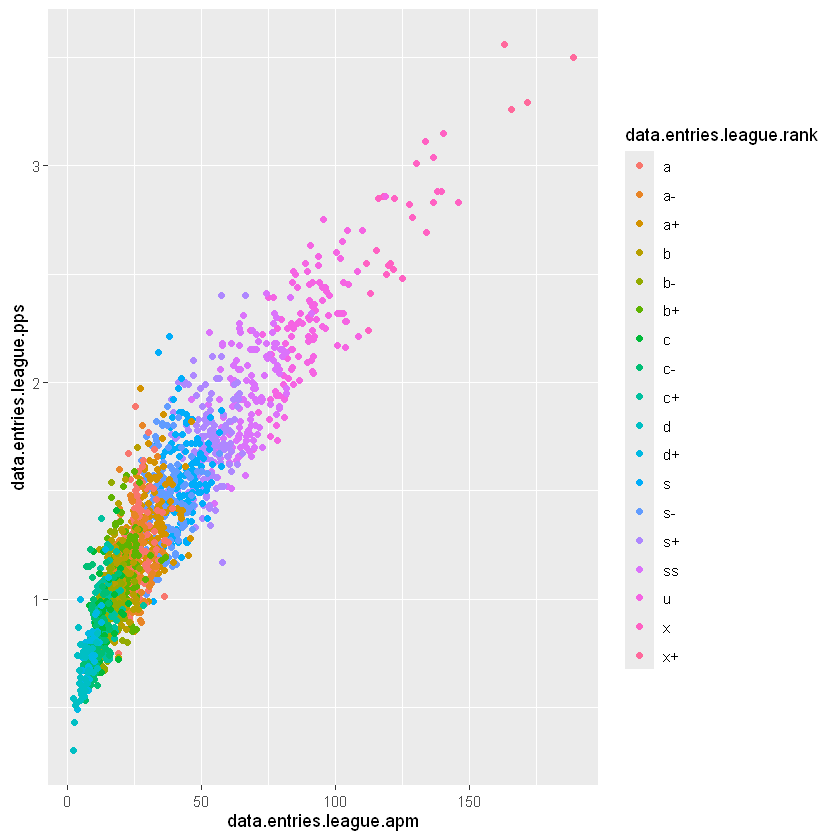

In [7]:
ggplot(players_df,aes( x = `data.entries.league.apm`, y = `data.entries.league.pps`, color= `data.entries.league.rank`))+
    geom_point()

In [1]:
players_df

ERROR: Error: object 'players_df' not found
